In [1]:
from FinancialMachineLearning.generator.stochasticprocess import *

In [2]:
stochastic = GeometricBrownianMotion(mu = 0, sigma = 0.028, 
                                          n_paths = 1, n_steps = 10000, 
                                          start = 10, end = 252, initial_price = 1000)

In [3]:
simulation = stochastic.simulate()

In [4]:
simulation

,0
2023-09-20 16:52:51.711221,1000.000000
2023-09-21 16:52:51.711221,1006.119752
2023-09-22 16:52:51.711221,1007.593168
2023-09-25 16:52:51.711221,1008.049880
2023-09-26 16:52:51.711221,1007.653374
...,...
2062-01-12 16:52:51.711221,872.836952
2062-01-13 16:52:51.711221,866.251165
2062-01-16 16:52:51.711221,870.404820
2062-01-17 16:52:51.711221,876.753468


<Axes: >

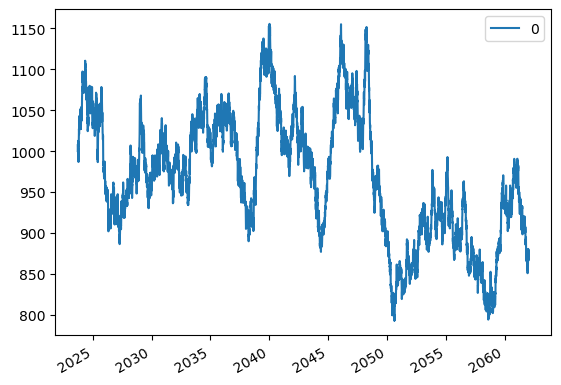

In [5]:
simulation.plot()

In [6]:
from FinancialMachineLearning.features.fracdiff import *

In [7]:
simulation.columns = ['close']

In [8]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 1, 11):
    try:
        df1 = np.log(simulation).dropna()
        df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d = d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index,'close'], df2['close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-2.676189,7.825007e-02,1.0,9998.0,-2.861829,1.000000
0.2,-1.743156,4.090253e-01,1.0,4.0,-4.474365,0.967214
0.3,-1.943575,3.118477e-01,1.0,11.0,-3.189369,0.893052
0.4,-2.009214,2.825478e-01,1.0,27.0,-2.976430,0.866705
0.5,-4.005181,1.383625e-03,1.0,68.0,-2.905087,0.327802
0.6,-6.848753,1.715743e-09,1.0,180.0,-2.877735,0.308185
0.7,-11.407623,7.382925e-21,1.0,513.0,-2.867190,0.338432
0.8,-21.984899,0.000000e+00,1.0,1559.0,-2.863396,0.133739
0.9,-42.161573,0.000000e+00,1.0,4653.0,-2.862161,0.059224
1.0,-68.995027,0.000000e+00,1.0,9997.0,-2.861829,0.029119


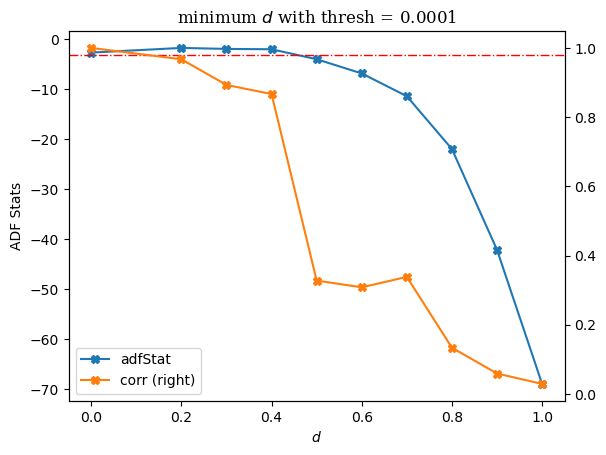

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
ax.set_title(r'minimum $d$ with thresh = 0.0001', fontfamily = 'Serif', fontsize = 12)
ax.set_xlabel(r'$d$')
ax.set_ylabel('ADF Stats');
display(out)

In [10]:
fracdiff = FractionalDifferentiatedFeatures.fracDiff_FFD(simulation, 0.5)

<Axes: >

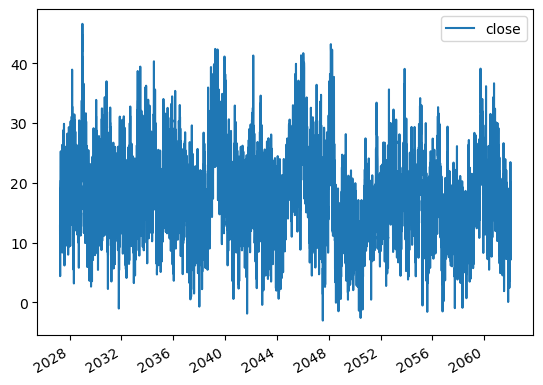

In [11]:
fracdiff.plot()

In [12]:
from FinancialMachineLearning.features.entropy import *
cont_etp = ContinuousEntropy(ret = fracdiff, period = 50)

In [13]:
apen = cont_etp.continuous_entropy()

<Axes: >

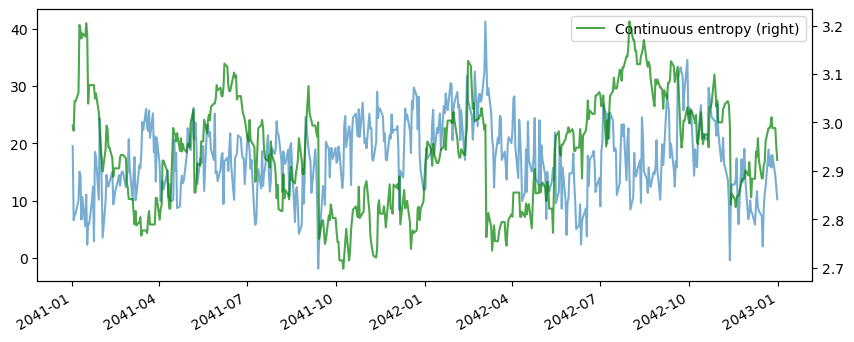

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(fracdiff.loc['2041' : '2042'], alpha = 0.6)
apen.loc['2041' : '2042'].plot(secondary_y = True, ax = ax, alpha = 0.7, color = 'green')

#### Discrete Entropy

In [15]:
fracdiff

,close
2027-04-08 16:52:51.711221,12.772376
2027-04-09 16:52:51.711221,5.555984
2027-04-12 16:52:51.711221,4.378250
2027-04-13 16:52:51.711221,7.935544
2027-04-14 16:52:51.711221,15.953741
...,...
2062-01-12 16:52:51.711221,13.024791
2062-01-13 16:52:51.711221,7.141174
2062-01-16 16:52:51.711221,14.814720
2062-01-17 16:52:51.711221,20.016554


In [16]:
quantile = pd.qcut(fracdiff.close, q = 10, labels = range(10))
quantile

2027-04-08 16:52:51.711221    2
2027-04-09 16:52:51.711221    0
2027-04-12 16:52:51.711221    0
2027-04-13 16:52:51.711221    0
2027-04-14 16:52:51.711221    4
                             ..
2062-01-12 16:52:51.711221    2
2062-01-13 16:52:51.711221    0
2062-01-16 16:52:51.711221    3
2062-01-17 16:52:51.711221    6
2062-01-18 16:52:51.711221    2
Name: close, Length: 9075, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [17]:
message = ''.join(map(str, quantile.values))
message

'200041015213537856325546336143111143388688885031437543547665765154469848587676879877525220011004631235523433831411212255448637558873456746764264256976764344765672203644144255886999688743445622463475466327561624573976643436823597748788899798799999879886878545673641642352422340140037554847998985989877665583796454867426737657464244288866437776488311424253646467855546311412366313002357779941466154677777467889829565272443125524638686888989898899999999999999999899899999989689978352133258865558335784636631122133738888878948776798766613788623786762440010000134551213131432787622136544225234554610323220542255230233357224445110001153111110061231100130311364876764733024477664566987756753575584573652110341028976628622037413876899699979389766528877424887536156552836450212465444276888767977688654777665476363132244326576666574423558962163056673898985844176998788878534545485662442512254222132346386999997989999889647764214577557687968889799999658942522503767576797634001031133121511313314354634263253538

In [18]:
etp = []
for i in range(10, len(message)) :
    etp.append(konto_entropy(message[i-10:i]))
etp = pd.DataFrame(etp, columns = ['Konto Entropy'], index = quantile.index[10:])
etp

,Konto Entropy
2027-04-22 16:52:51.711221,1.487042
2027-04-23 16:52:51.711221,1.381378
2027-04-26 16:52:51.711221,1.307682
2027-04-27 16:52:51.711221,1.466178
2027-04-28 16:52:51.711221,1.698371
...,...
2062-01-12 16:52:51.711221,1.439874
2062-01-13 16:52:51.711221,1.507682
2062-01-16 16:52:51.711221,1.353709
2062-01-17 16:52:51.711221,1.481378


Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion')

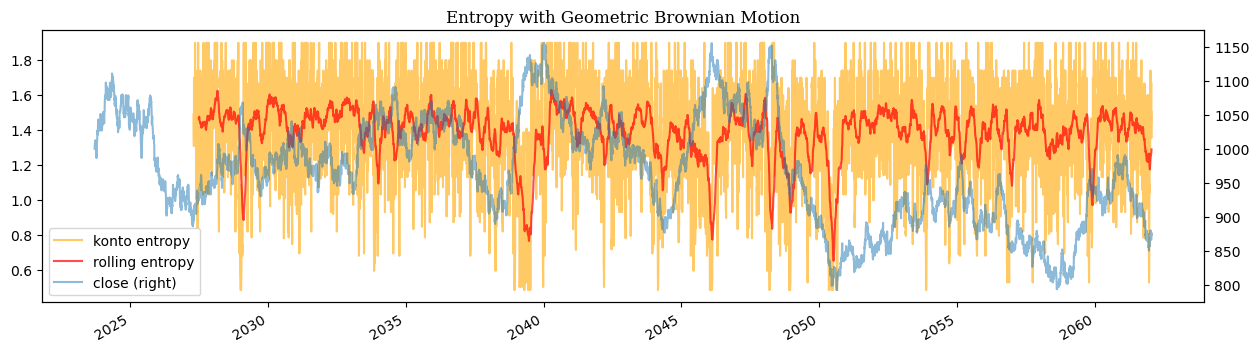

In [21]:
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(etp, color = 'orange', alpha = 0.6, label = 'konto entropy')
ax.plot(etp.rolling(window = 50).mean(), color = 'red', alpha = 0.7, label = 'rolling entropy')
ax.legend()
simulation.plot(secondary_y = True, ax = ax, alpha = 0.5, label = 'Geometric Brownian Motion')
plt.title('Entropy with Geometric Brownian Motion', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Entropy with Geometric Brownian Motion (window = 50)')

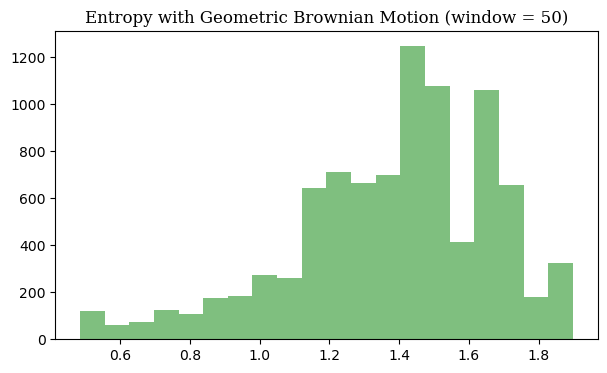

In [22]:
plt.figure(figsize = (7,4))
plt.hist(etp, bins = 20, color = 'g', alpha = 0.5)
plt.title('Entropy with Geometric Brownian Motion (window = 50)', fontsize = 12, fontfamily = 'Serif')